Credits: inspired to introduction in
Raschka, Machine Learning with PyTorch, Chap 18

## A (Very) Preliminary Introduction to Graph Neural Networks

GNNs have been an area of rapid development in recent years. According to the State of AI report from 2021 (https://www.stateof.ai/2021-report-launch.html), GNN are used for:

*   Text classification (https://arxiv.org/abs/1710.10903)

*   Recommendation systems (https://arxiv.org/abs/1704.06803)

* Traffic forecasting (https://arxiv.org/abs/1707.01926)

* Drug discovery (https://arxiv.org/abs/1806.02473)



GNN (Graph Neural Network) is a general term for any neural network designed to operate on graph-structured data. It encompasses various architectures that can learn representations of nodes, edges, or entire graphs by aggregating information across graph structures.

GCN (Graph Convolutional Network) is a specific type of GNN that applies convolutional operations to graphs. It’s inspired by the concept of convolution in image processing and operates by aggregating a node's features with its neighbors' features, often using a normalized adjacency matrix to preserve structural information.

GCNs are more widely recognized and used, especially since the original GCN paper by Kipf and Welling (2016) made the approach popular for tasks like node classification and link prediction.
However, GNN is a broader category, and newer architectures (like Graph Attention Networks or GATs) are also popular under the GNN umbrella for specific applications and improvements on the basic GCN model.

There are many different kinds of graph con- volutions, and the development of new graph convolutions is a very active area of research.

### Introduction to graph data

In [1]:
from IPython.display import Image

img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im1.png"


Image(url=img_url, width = 600)


#### Undirected graphs

An undirected graph consists of nodes (in graph theory also often called vertices) that are connected via edges where the order of the nodes and their connection does not matter.

In [2]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im2.png"


Image(url=img_url, width = 1000)

#### Directed graphs

Directed graphs, in contrast to undirected graphs discussed in the previous section, connect nodes via directed edges. Mathematically they are defined in the same way as an undirected graph, except that $E$, the set of edges, is a set of ordered pairs. Therefore, element $x_{ij}$ of A does need not to be equal to $x_{ji}$.

In [3]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im3.png"


Image(url=img_url, width = 600)

Other examples
https://www.connectedpapers.com/

### Labeled graphs

Many of the graphs we work with include additional information tied to their nodes and edges. For instance, consider the caffeine molecule mentioned earlier: molecules can be modeled as graphs, where each node represents a chemical element (e.g., O, C, N, or H), and each edge represents a chemical bond (e.g., single or double bond) between atoms.

To make use of this information, node and edge features must be encoded appropriately. Given a graph **G**, defined by a node set and edge set \((V, E)\), we define a node feature matrix **X** of size \(|V| $\times$ f$_v$\), where \(f$_v$\) is the dimensionality of the node feature vector. Similarly, for edges, we define an edge feature matrix **X<sub>E</sub>** of size \(|E| $\times$ f$_E$\), where \(f$_E$\) is the dimensionality of the edge feature vector.



#### Example: Representing molecules as graphs


In [4]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im4.png"


Image(url=img_url, width = 1000)

### Understanding graph convolutions

To understand the motivation behind using graph convolutions, we have to do one step back and think of CNN.

In the CNN, the filter can be viewed as a "detector" for a specific feature. This approach to feature detection is well-suited for images for several reasons:



*   **Shift-invariance**: We can still recognize a feature in an image regardless of where it is located (for example, after translation). A cat can be recognized as a cat whether it is in the top left, bottom right, or another part of an image.

*   **Locality**: Nearby pixels are closely related.

*   **Hierarchy**: Larger parts of an image can often be broken down into combinations of associated smaller parts. A cat has a head and legs; the head has eyes and a nose; the eyes have pupils and irises.



Another reason convolutions are well-suited for processing images is that the number of trainable parameters does not depend on the dimensionality of the input. You could train a series of 3×3 convolutional filters on, for example, a 256×256 or a 9×9 image.

**Like images, graphs also have natural properties that justify a convolutional approach.** Both approaches share the locality property: a node that is one edge away is more likely to be related than a node five edges away. For example, in a citation graph, a directly cited publication, which would be one edge away, is more likely to have similar subject matter than a publication with multiple degrees of separation.


A strict property for graph data is **permutation invariance**, which means that the ordering of the nodes does not affect the output.



In [5]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im5.png"


Image(url=img_url, width = 1000)

**The same graph can be represented by multiple adjacency**

### Implementing a basic graph convolution

In [6]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im6.png"


Image(url=img_url, width = 1000)

In [7]:
import networkx as nx
import numpy as np

In [8]:
G = nx.Graph()

#Hex codes for colors if we draw graph
blue, orange, green = "#1f77b4", "#ff7f0e","#2ca02c"

G.add_nodes_from([(1, {"color": blue, 'pippo': "ciao"}),
                  (2, {"color": orange}),
                  (3, {"color": blue}),
                  (4, {"color": green})])

G.add_edges_from([(1, 2),(2, 3),(1, 3),(3, 4)])
A = np.asarray(nx.adjacency_matrix(G).todense())
print(A)


[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]


In [9]:
nx.get_node_attributes(G, 'color').values()

dict_values(['#1f77b4', '#ff7f0e', '#1f77b4', '#2ca02c'])

In [10]:
mapping_dict = {green: 0, blue: 1, orange: 2}

In [11]:
print(mapping_dict["#1f77b4"], mapping_dict["#ff7f0e"], mapping_dict["#2ca02c"])

1 2 0


In [12]:
print(mapping_dict[green])

0


In [13]:
one_hot_idxs = np.array([mapping_dict[v] for v in nx.get_node_attributes(G, 'color').values()])

In [14]:
def build_graph_color_label_representation(G,mapping_dict):
    one_hot_idxs = np.array([mapping_dict[v] for v in
                             nx.get_node_attributes(G, 'color').values()])
    one_hot_encoding = np.zeros((one_hot_idxs.size,len(mapping_dict))) #(4,3)
    one_hot_encoding[np.arange(one_hot_idxs.size),one_hot_idxs] = 1
    return one_hot_encoding

X = build_graph_color_label_representation(G, {green: 0, blue: 1, orange: 2})
print(X)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


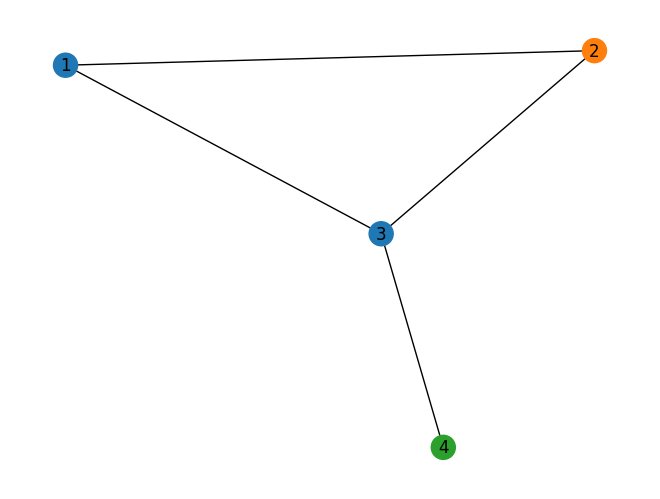

In [15]:
color_map = nx.get_node_attributes(G, 'color').values()

nx.draw(G, with_labels=True, node_color=color_map)

Each node in a graph has a set of features represented by embedding in a matrix $X$. $x_{i}$ is the feature vector for node $i$.


For our example implementation, the graph convolution will take the following form:


$
\mathbf{x}_i' = \mathbf{x}_i \mathbf{W}_1 + \sum_{j \in \mathcal{N}(i)} \mathbf{x}_j \mathbf{W}_2 + \mathbf{b}
$

where:
- $\mathbf{x}_i'$ is the updated embedding for node $i$,
- $\mathbf{W}_1$ and $\mathbf{W}_2$ are $f_{\text{in}} \times f_{\text{out}}$ matrices of learnable filter weights,
- $\mathbf{b}$ is a learnable bias vector of length $f_{\text{out}}$.




In [16]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im7.png"


Image(url=img_url, width = 1000)

The graph convolution is more effective when there is a **locality property**.


By stacking other convolution layers, the updated embeddings can incorporate information from nodes that were originally edges away.


The design of the graph convolution illustrated in the above Figure fits our graph data, but it may not be clear how to implement the **sum over neighbors in matrix form. This is where we utilize the adjacency matrix A**.


In [18]:
print(X.shape[1])

3


In [19]:
# 6 is an arbitrary choice representing the output dimensionality of the node features after the graph convolution
# — that is, each node's features will be projected into a 6-dimensional space.
f_in, f_out = X.shape[1], 6
W_1 = np.random.rand(f_in, f_out)
W_2 = np.random.rand(f_in, f_out)
h = np.dot(X,W_1) + np.dot(np.dot(A, X), W_2)

In [20]:
print(np.shape(X))
print(np.shape(A))
print(np.shape(W_1), np.shape(W_2))
print(np.shape(h))

(4, 3)
(4, 4)
(3, 6) (3, 6)
(4, 6)


Ultimately, the goal of a graph convolutional layer is to update the node representations in X by leveraging the structural connectivity captured in the adjacency matrix A. There are various approaches to achieving this, which has led to the development of many different types of graph convolutional methods.

#### **Message Passing in Graph Neural Networks**

The following framework is inherited from ''Neural Message Passing for Quantum Chemistry'' by Justin Gilmer and colleagues, 2017, https://arxiv.org/abs/1704.01212.

In the **message-passing** framework, each node in the graph is associated with a hidden state \( h$_i^{(t)}$ \), where \( i \) is the node index and \( t \) is the time step or layer number. The initial hidden state \( h$_i^{(0)}$ \) is set to \( X$_i$ \), the feature vector for node \( i \), i.e., the corresponding row of the input feature matrix \( X \).

Graph convolutional operations typically consist of two main phases:

1. **Message Passing Phase**: Each node gathers information from its neighbors.
2. **Node Update Phase**: Each node updates its own hidden state based on the received messages.

Let \( N(i) \) denote the set of neighbors of node \( i \):
- For **undirected graphs**, \( N(i) \) includes all nodes that share an edge with node \( i \).
- For **directed graphs**, \( N(i) \) includes all nodes that have an edge pointing to node \( i \).

The **message-passing phase** can be expressed mathematically as:


$$m_i = \sum_{j \in N(i)} M_t\left(h_i^{(t)}, h_j^{(t)}, e_{ij}\right)$$

Here, \( M$_t$ \) is the message function that computes the message from neighbor \( j \) to node \( i \), based on their hidden states and the edge features \( e$_{ij}$ \).

In our previous example, each node just sends its state, linearly transformed by W$_{2}$; we therefore define the message function as:


$$M_t = h_j^{(t)} W_2$$

The **node update phase** uses an update function \( U$_t$ \) to compute the next hidden state:

$$h_i^{(t+1)} = U_t(h_i^{(t)}, m_i)$$

In our specific example, the update function is a simple affine transformation:


$$h_i^{(t+1)} = h_i^{(t)} W_1 + m_i + b$$

This formulation reflects a basic graph convolution step: messages are aggregated from neighbors and combined with the node’s current state to compute the new representation.

In [26]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im8.png"


Image(url=img_url, width = 600)

### **Implementing a GNN in PyTorch**

#### Defining the NodeNetwork model

In [46]:
import networkx as nx
import torch
from torch.nn.parameter import Parameter
import numpy as np
import torch.nn.functional as F

In [47]:
# This is a custom PyTorch model built for classifying graphs, working on batches of graph

class NodeNetwork(torch.nn.Module):

    def __init__(self, input_features):
        super().__init__()

        # input_features: number of features per node

        # BasicGraphConvolutionLayer: a type of custom neural network layer designed to process information on graph-structured data
        self.conv_1 = BasicGraphConvolutionLayer(input_features, 32) # transforming node features # See definition in below code
        self.conv_2 = BasicGraphConvolutionLayer(32, 32)
        self.fc_1 = torch.nn.Linear(32, 16)
        self.out_layer = torch.nn.Linear(16, 2)

    def forward(self, X, A,batch_mat):
        # X: node features (for all nodes across all graphs in the batch)
        # A: adjacency matrix
        # batch_mat: indicates which graph each node belongs to in the batch (important for pooling)
        x = F.relu(self.conv_1(X, A))
        x = F.relu(self.conv_2(x, A))

        output = global_sum_pool(x, batch_mat) # See definition in below code
        # global_sum_pool aggregates node features into graph-level embeddings
        # by summing node features per graph → output shape: [num_graphs, 32]


        output = self.fc_1(output)
        output = self.out_layer(output)

        return F.softmax(output, dim=1)

As we will see, `batch_mat` indicates which nodes belong to which graph in a batch of graphs (each with different dimensions)






The following gives an idea of what we want to achieve.

In [48]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im9.png"


Image(url=img_url, width = 1000)

The job of graph convolution layers is to let each node gather information from its neighbors, and combine that with its own.

The more GNN layers you apply, the larger the "receptive field" each node sees.

* After 1 layer: each node knows about its immediate neighbors.

* After 2 layers: each node knows about neighbors of neighbors (2-hop info).

* Once your nodes have "seen enough of the graph" and are well-represented, you can aggregate them (sum, mean, max) to produce a graph-level vector.

### **Coding the NodeNetwork’s graph convolution layer**

In [49]:
class BasicGraphConvolutionLayer(torch.nn.Module):

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels

        self.W2 = Parameter(torch.rand(
             (in_channels, out_channels), dtype=torch.float32))
        self.W1 = Parameter(torch.rand(
             (in_channels, out_channels), dtype=torch.float32))

        self.bias = Parameter(torch.zeros(
                 out_channels, dtype=torch.float32))

    def forward(self, X, A):
        potential_msgs = torch.mm(X, self.W2)
        propagated_msgs = torch.mm(A, potential_msgs)
        root_update = torch.mm(X, self.W1)
        output = propagated_msgs + root_update + self.bias
        return output

In [50]:
print('X.shape:', X.shape)
print('A.shape:', A.shape)

X.shape: (4, 3)
A.shape: (4, 4)


In [51]:
# change the dimensionality of the out_channels and check the resulting output shape

basiclayer = BasicGraphConvolutionLayer(3, 8)
out = basiclayer(
    torch.from_numpy(X).float(), torch.from_numpy(A).float()
    )
print('Output shape: ', out.shape)

Output shape:  torch.Size([4, 8])


### Adding a global pooling layer to deal with varying graph sizes

Global pooling can be done with any permutation invariant function, for example, sum, max, and mean.

The following `global_sum_pool` sums all the node embeddings of a graph

In [52]:
def global_sum_pool(X, batch_mat):

    if batch_mat is None or batch_mat.dim() == 1:
        return torch.sum(X, dim=0).unsqueeze(0) #[1, feature_dim]
    else:
        return torch.mm(batch_mat, X)   #[num_graphs, feature_dim]


#batch_mat[i,j] means node j belongs to graph i
# i.e., batch_mat[i, j] = 1 if node j belongs to graph i, 0 otherwise
#batch_mat [num_graphs, num_nodes]
# X [num_nodes, feature_dim]


When all data in a dataset has the same dimensionality, batching the data is as straightforward as adding a dimension by stacking the data. (Side note: the function called in the default batching function in PyTorch is literally called stack.) Since graph sizes vary, this approach is not feasible with graph data unless padding is used. However, padding can be inefficient in cases where graph sizes can vary substantially. Usually, the better way to deal with varying graph sizes is to treat each batch as a single graph where each graph in the batch is a subgraph that is disconnected from the rest.

The following is a simplified GCN with three graphs with varying size batched together as single graph. Notice each graph shares the same number of node features.
This is to give an idea of how it operates with varying graph size.


In [53]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im10.png"


Image(url=img_url, width = 1000)

In [59]:
# creates a batch indicator matrix based on a list graph_sizes

# the following works at the batch level

def get_batch_tensor(graph_sizes):  #graph_sizes is a list where each element is the size of a graph
    starts = [sum(graph_sizes[:idx]) for idx in range(len(graph_sizes))]
    stops = [starts[idx]+graph_sizes[idx] for idx in range(len(graph_sizes))]
    tot_len = sum(graph_sizes)
    batch_size = len(graph_sizes)
    batch_mat = torch.zeros([batch_size, tot_len]).float() # tot_len is the number of nodes
    for idx, starts_and_stops in enumerate(zip(starts, stops)):  #idx is the graph index in the batch
        start = starts_and_stops[0]
        stop = starts_and_stops[1]
        batch_mat[idx, start:stop] = 1
    return batch_mat

In [60]:
# the following combines mutliple graphs in a batch into a single unified representation

def collate_graphs(batch):

    adj_mats = [graph['A'] for graph in batch] #graph['A'] extracts the adjacency matrix
    sizes = [A.size(0) for A in adj_mats] # number of nodes in each graph
    tot_size = sum(sizes) # tot number of nodes in the batch
    # create batch matrix
    batch_mat = get_batch_tensor(sizes)  #[batch_size, tot_size]
    # combine feature matrices
    feat_mats = torch.cat([graph['X'] for graph in batch],dim=0)
    # combine labels
    labels = torch.cat([graph['y'] for graph in batch], dim=0)
    # combine adjacency matrices
    batch_adj = torch.zeros([tot_size, tot_size], dtype=torch.float32)
    accum = 0

    for adj in adj_mats:
        g_size = adj.shape[0]
        batch_adj[accum:accum+g_size, accum:accum+g_size] = adj
        accum = accum + g_size
    repr_and_label = {
            'A': batch_adj, # block diagonal adjacency matrix in the batch
            'X': feat_mats, # combied feature matrix
            'y': labels,
            'batch' : batch_mat}

    return repr_and_label

### Preparing the DataLoader

In [62]:
def get_graph_dict(G, mapping_dict):
    # build dictionary representation of graph G
    A = torch.from_numpy(np.asarray(nx.adjacency_matrix(G).todense())).float()
    # build_graph_color_label_representation() was introduced with the first example graph
    X = torch.from_numpy(build_graph_color_label_representation(G,mapping_dict)).float()
    # kludge since there is not specific task for this example
    y = torch.tensor([[1, 0]]).float()  # one-hot encoded
    return {'A': A, 'X': X, 'y': y, 'batch': None}

# building 4 graphs to treat as a dataset

blue, orange, green = "#1f77b4", "#ff7f0e","#2ca02c"
mapping_dict = {green: 0, blue: 1, orange: 2}

G1 = nx.Graph()
G1.add_nodes_from([(1, {"color": blue}),
                   (2, {"color": orange}),
                   (3, {"color": blue}),
                   (4, {"color": green})])
G1.add_edges_from([(1, 2), (2, 3),(1, 3), (3, 4)])

G2 = nx.Graph()
G2.add_nodes_from([(1, {"color": green}),
                   (2, {"color": green}),
                   (3, {"color": orange}),
                   (4, {"color": orange}),
                   (5, {"color": blue})])
G2.add_edges_from([(2, 3),(3, 4),(3, 1),(5, 1)])

G3 = nx.Graph()
G3.add_nodes_from([(1, {"color": orange}),
                   (2, {"color": orange}),
                   (3, {"color": green}),
                   (4, {"color": green}),
                   (5, {"color": blue}),
                   (6, {"color":orange})])
G3.add_edges_from([(2, 3), (3, 4), (3, 1), (5, 1), (2, 5), (6, 1)])

G4 = nx.Graph()
G4.add_nodes_from([(1, {"color": blue}), (2, {"color": blue}), (3, {"color": green})])
G4.add_edges_from([(1, 2), (2, 3)])

graph_list = [get_graph_dict(graph,mapping_dict) for graph in [G1, G2, G3, G4]]

In [66]:
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/94de99576a12d36a84046589e11722516d240af6/DATA621/DATA621/images/im11.png"


Image(url=img_url, width = 1000)

In [57]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class ExampleDataset(Dataset):

    # Simple PyTorch dataset that will use our list of graphs
    def __init__(self, graph_list):
        self.graphs = graph_list

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self,idx):
        mol_rep = self.graphs[idx]
        return mol_rep

In [58]:
dset = ExampleDataset(graph_list)
# Note how we use our custom collate function
loader = DataLoader(dset, batch_size=2, shuffle=False, collate_fn=collate_graphs)

### Using the NodeNetwork to make "predictions"

No training yet. We just familiarized with working with graph data.

In [68]:
torch.manual_seed(123)
node_features = 3
net = NodeNetwork(node_features)

In [71]:
batch_results = []

for b in loader:
    batch_results.append(net(b['X'], b['A'], b['batch']).detach())


Note that for brevity, we didn’t include a training loop; however, the GNN model could be trained in a regular fashion by computing the loss between predicted and true class labels, backpropagating the loss via `.backward()`, and updating the model weights via a gradient descent-based optimizer. We leave this as an optional exercise for the reader.

In the following, to check that the batch loader works correctly:

In [72]:

G1_rep = dset[1]
G1_single = net(G1_rep['X'], G1_rep['A'], G1_rep['batch']).detach()

G1_batch = batch_results[0][1]
# compare tensors element-wise, and check if they are numerically close
torch.all(torch.isclose(G1_single, G1_batch))

tensor(True)